## Customer Demographics Analysis and Predicting Modeling of Purchase amounts

##### Case study and DataHack competition hosted by [Analytics Vidhya](https://datahack.analyticsvidhya.com/contest/black-friday/)

###### Autor: [Datageekette](http://datageekette.com/)


#### Problem Statement

A retail company wants to understand the customer purchase behaviour and build a model to predict the purchase amount of customer against various product categories which will help them to create more customer-focused offers.

#### Data description

Dataset contains purchase summary of customers for high volume products (for a certain period). It also contains customer demographics like age, gender, marital status, type of a city, quantity of years stayed in the city, product details and a total purchase amount.

| VarName | Description |
| --- | --- |
| User_ID| User ID |
| Product_ID | Product ID |
| Gender | Sex of User |
| Age | Age in bins |
| Occupation | Occupation (Masked) |
| City_Category | Category of the City (A, B, C) |
| Stay_In_Current_City_Years | Number of years stay in current city |
| Marital_Status | Marital Status (1 - married, 0 - single) |
| Product_Category_1 | Product Category (Masked) |
| Product_Category_2 | Product may belongs to other category also (Masked) |
| Product_Category_3 | Product may belongs to other category also (Masked) |
| Purchase | Purchase Amount (Target Variable) |           


#### Comments of the author

It's a shame that a few variables are masked from the dataset, like customer Occupation and Product Categories. Despite that, we can still have an interesting analysis of customer demographics and surely answer to the main task: predicting customer purchase amount againt products categories.

This Notebook was created with intention to:
  - create a business case type portfolio project
  - help aspired data analysts to manage their data analysis projects' workflow
  - have a dipper understanding of algorythms for regression tasks
  
###### Ready or not let's begin.

### I. Data Analysis of Customer demographics

Loading packages and data. Notice that I have an initially splitted data: train and test sets.

In [138]:
# data manipulation
require(plyr)
require(dplyr)

# data visualization + color palettes for ggplot2
require(ggplot2)
require(RColorBrewer)

# loading data
train <- read.csv("~/Documents/projects/blackfriday/train.csv",
                  colClasses = c("integer", "character", rep("factor", 9), "integer"))
test <- read.csv("~/Documents/projects/blackfriday/test.csv",
                  colClasses = c("integer", "character", rep("factor", 9)))

Let's take a quick look:

In [71]:
# glancing at data (without purchase amount)
train[,1:11] %>% 
    rbind(test) %>%
    glimpse()

Observations: 783,667
Variables: 11
$ User_ID                    <int> 1000001, 1000001, 1000001, 1000001, 1000...
$ Product_ID                 <chr> "P00069042", "P00248942", "P00087842", "...
$ Gender                     <fctr> F, F, F, F, M, M, M, M, M, M, M, M, M, ...
$ Age                        <fctr> 0-17, 0-17, 0-17, 0-17, 55+, 26-35, 46-...
$ Occupation                 <fctr> 10, 10, 10, 10, 16, 15, 7, 7, 7, 20, 20...
$ City_Category              <fctr> A, A, A, A, C, A, B, B, B, A, A, A, A, ...
$ Stay_In_Current_City_Years <fctr> 2, 2, 2, 2, 4+, 3, 2, 2, 2, 1, 1, 1, 1,...
$ Marital_Status             <fctr> 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, ...
$ Product_Category_1         <fctr> 3, 1, 12, 12, 8, 1, 1, 1, 1, 8, 5, 8, 8...
$ Product_Category_2         <fctr> , 6, , 14, , 2, 8, 15, 16, , 11, , , 2,...
$ Product_Category_3         <fctr> , 14, , , , , 17, , , , , , , 5, 14, , ...


Overall dataset contains around 790k observations. Looking at the data types you can see most of them are factors (I intentionally transformed into those). Especially products categories, as I wanted them to be formated as usual categories that we see in a daily life -  factors. 

Let's now start data exploring. The best way to do this is to create informative yet simple visualizations.

In [3]:
# unite two splitted sets together for a bigger picture
full <- rbind(train[, 1:11], test)
# assign levels to Marital Status
levels(full$Marital_Status) <- c("single", "married")

In this case it makes sense to create a facet grid graph on the whole dataset.
Facet grid is one of the best type if visual data presentation outhere. Not suprisingly, as it gives a concise view of a variable distribution against the ones in interest, and ggplot2 helps at customizing it the way we want the grid to be displayed.

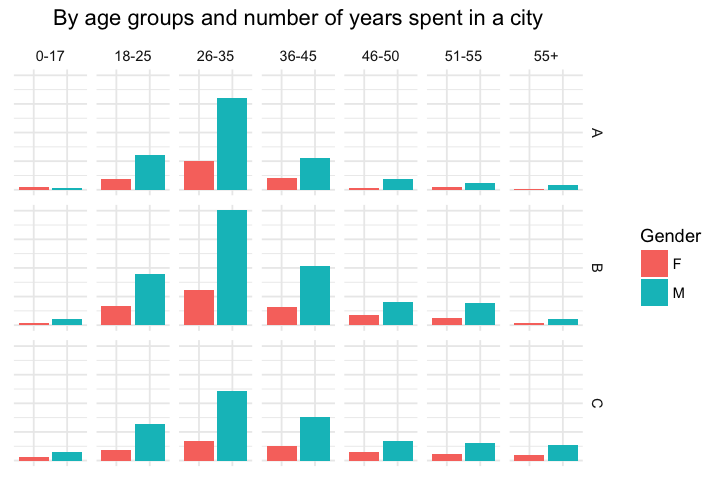

In [177]:
# plot size 
options(repr.plot.width = 6, repr.plot.height = 4)

# setting themes
custom_theme <- theme(plot.title = element_text(hjust = 0.5),
                      legend.position = "right")

no_ticks_axis <- theme(axis.text = element_blank(),
                       axis.ticks = element_blank())

age_city <- ggplot(full, aes(x = Gender))
age_city + geom_bar(aes(fill = Gender),
             position = "dodge") +
    labs(title = "By age groups and number of years spent in a city", 
         x = NULL, y = NULL) +
    facet_grid(City_Category ~ Age) + 
    theme_minimal() +
    custom_theme +
    no_ticks_axis

From the plots above we can now draw a portrait of the most targeted customer. It's a usually man aged between 26-35 years old from B city category.

We can also see that customers above 35 have less interest in products than younger generation, which leads to a though that there's might be some (human) physical limits involved. 

If the retailor's business sector is sport, then sport's equipment would be at the peak of sales in the same age group shown above (from 26 to 35 years), under decreasing trend among customers under 25 (possibly because these goods are often too expensive) and elderly.

B city category seems to gain more trafic in terms of orders than the rest. 

Let's see what else we can find. What about marital status and customer's occupation (which is masked, but anyway). It would be good to know what are the proportions for each case. So instead of plotting the data we create tables.

In [87]:
require(formattable)

# single/married customers
full %>%
    group_by(Marital_Status) %>%
    summarize(n_cust = n()) %>%
    mutate(prop = round(n_cust / sum(n_cust) * 100, 2))

# top 5 occupations
full %>%
    group_by(Occupation) %>%
    summarize(n_cust = n()) %>%
    mutate(prop = round(n_cust / sum(n_cust) * 100, 2)) %>%
    arrange(desc(prop)) %>%
    head(5) 

Marital_Status,n_cust,prop
single,462538,59.02
married,321129,40.98


Occupation,n_cust,prop
4,103086,13.15
0,98850,12.61
7,84127,10.74
1,67687,8.64
17,57418,7.33


As we can see single customers are in majority and top 5 occupations shows which occupation types are the most frequent ones in the dataset.

#### Conclusion of the Customer demographics analysis:

- Customer portrait: a man between 26-35 from B city category, usually single.
- Female customers follow the same trend as male: peak of sales between age 25-26. 
- Customers with ocuppation types 4, 0, 7, 1 and 17 are the most frequent clients of the retailer. Together they represent more than a half of a total number of customers.
- There should be provided more attention to A city category: investigate online & offline marketing campaigns, customer satisfaction etc

### II. Analysing and Preparing: Target and Dependent variables

Before building any models we need to make sure that we get familiar with the variables in our hands.

#### Checking for Normality

Why is this important even for large samples like this one? 

First of all, normality should be taken seriously, because when this assumption does not hold, it is then impossible to make reliable conclusions about the reality. Secondly, we know that for large samples the violation of the normality assumption should not cause major problems (thanks to Central Limit Theorem) because the sampling distribution tends to be normal anyway, regardless of the shape of the data. 

But. We do want to have a sense of data to model: if it's skewed then how badly, are there any outliers that we should take care of. Basically how far the distribution is from being a normal one. 
 
If it was a classification task, the skewness would play an important role at deciding which performance metric to use: ROC or Precision-Recall curves. For more information on this last example visit: http://pages.cs.wisc.edu/~jdavis/davisgoadrichcamera2.pdf

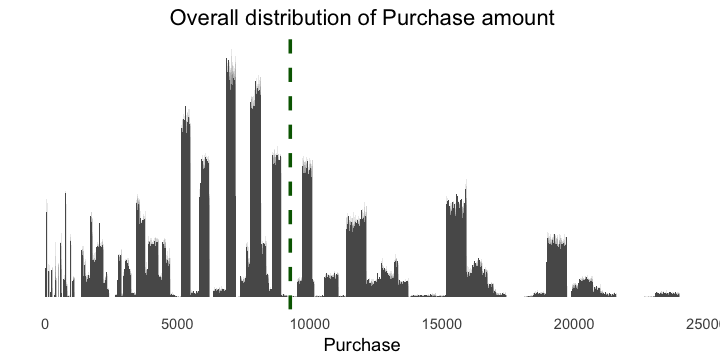

In [170]:
# plot size 
options(repr.plot.width = 6, repr.plot.height = 3)

# custom theme
hist_theme <- theme(panel.grid = element_blank(),
                    plot.title = element_text(hjust = .5),
                    axis.text.y = element_blank(),
                    axis.ticks.y = element_blank())

# overall distribution of purchase amounts
ggplot(train, aes(x = Purchase)) + 
  geom_histogram(binwidth = 5) +
  labs(title = "Overall distribution of Purchase amount", 
       y = NULL) +
  geom_vline(aes(xintercept = mean(train$Purchase)), 
             col = "darkgreen", size = 1, linetype = "dashed") + 
  theme_minimal() +
  hist_theme

From the plot above we see that the distribution is skewed to the right, which has impacted the average amount of purchase, and there are few aggregations among highest purchase amounts. 

We can also easily spot outliers. They correspond to sales with purchase amounts above 22k. Most of the time decision for including or excluding outliers depends on the origine of data. Here we have already cleaned data, so these high amounts represent real data points. 

Let's not plot the distribution by gender. As on the previous plots: red for female, blue for male. Like in kindergarten.

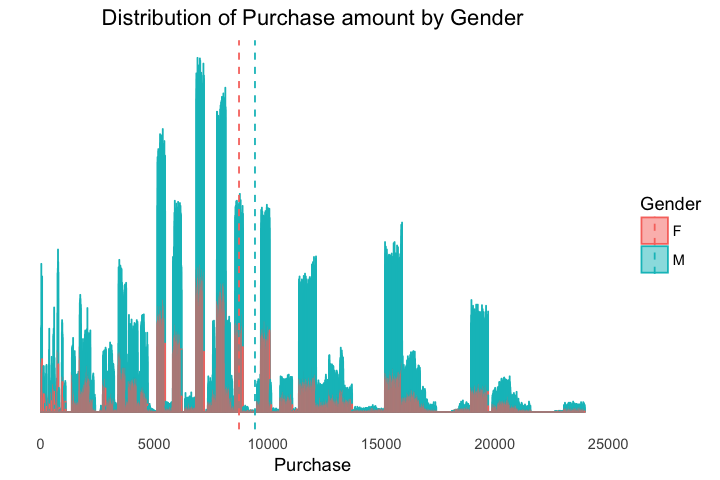

In [178]:
# calculate purchase average amounts for each gender
average <- ddply(train, "Gender", summarise, g.mean = mean(Purchase))

# Interleaved histograms
ggplot(train, aes(x = Purchase, 
                  color = Gender,
                  fill = Gender)) +
  geom_histogram(position = "dodge", binwidth = 5, alpha = .5) +
  geom_vline(data = average, aes(xintercept = g.mean, color = Gender),
             linetype = "dashed") +
  labs(title = "Distribution of Purchase amount by Gender", y = NULL) +
  theme_minimal() +
  custom_theme +
  hist_theme

Obviously enough, distributions are almost the same. As we saw that before they follow the same trends. Despite the fact that male customers represent the majority of the retailer's clients, both purchase averages are almost the same, and correspond to the overall average.

If we were slicing the data further we would see that against customer demographics information the shape of the distribution doesn't change much: it would be still skewed with few aggregations on the right tail.

The only variables that could change it though is product categories, which we will plot in the next section of this part. 

For now, we need to check how exactly far from the normality lies down our distribution:

In [127]:
require(moments)
cat('skewness and kurtosis of distribution are', 
    skewness(train$Purchase), 'and', kurtosis(train$Purchase), 'respectively')

skewness and kurtosis of distribution are 0.6001384 and 2.661615 respectively

Under the hypothesis of normality, data should be symmetrical which results in skewness equal to zero. In real world though a normal distribution is a (very) rare case. So in our example it is already good enough to have a moderately skewed distribution, between 0.5 and 1.

As for kurtosis, which relates to the tails of the distribution and indicates the frequency of outliers in data, in our example it is less than 3. In its turn that means that the distribution has fewer and less extreme outliers than does the normal distribution (where the kurtosis is equal to 3).

So what we have here is a moderately skewed distribution with few extreme outliers.

#### Product Categories

Let's take a look at the product categories. I remind that every next column describes to which category a product belongs in addition to the first (main) category. 

In [93]:
train[, 9:11] %>%
 summary()

 Product_Category_1 Product_Category_2 Product_Category_3
 5      :150933            :173638            :383247    
 1      :140378     8      : 64088     16     : 32636    
 8      :113925     14     : 55108     15     : 28013    
 11     : 24287     2      : 49217     14     : 18428    
 2      : 23864     16     : 43255     17     : 16702    
 6      : 20466     15     : 37855     5      : 16658    
 (Other): 76215     (Other):126907     (Other): 54384    

There are at least two things that we can see here:
- About a half of products (~383k) belongs to only one category. 
- Top 3 first-type categories are 1, 5 and 8.  

Let's see how purchase amount are distributed by first product category:

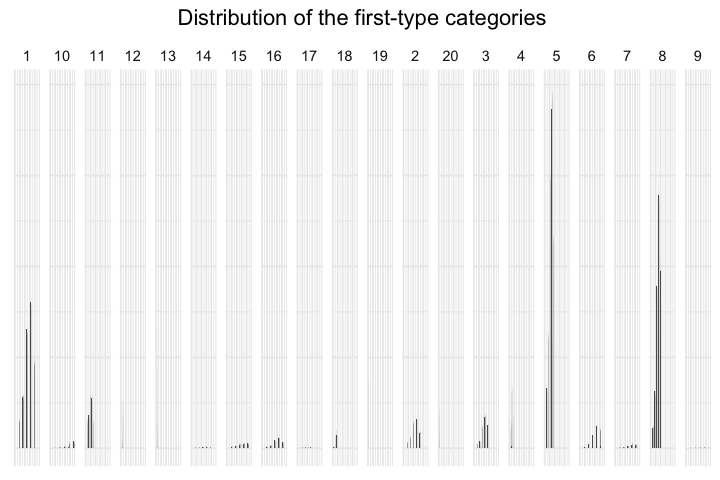

In [150]:
ggplot(train[,c(9, 12)], 
       aes(x = Purchase)) + 
  geom_histogram(binwidth = 25) +
  labs(title = "Distribution of the first-type categories", x = NULL, y = NULL) +
  facet_grid(~ Product_Category_1) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = .5)) +
  no_ticks_axis

Indeed, the distribution of purchase amounts drastically changes by product categories. Which leads us to a thought that product categories the are most relevant predictors for this case.

### III. Predictive modeling of Purchase amount

#### From baseline to advanced

It's in practice to start off the process by building the baseline model. In our example, for regression task where the ourcome is a continious variable, we will average the target variable and use it as a base ofr further comparison. 

In order to evaluate the performance of the algorythm we will not only look at the error metrics but also at its speed. 

For continuous outcome, one of the main error metrics to evaluate will be RMSE (root mean squared error). Thise measure gives more weight to larger residuals (the difference between the predicted and the observed value) than to smaller ones. Essentially this means that we consider missing the prediction for the 2x higher amount of Purchase is more than twice worse than missing x1 amount. We want this number to be as lowest as possible.

We will also focus on avoiding overfitting: it's a regression task that predicts a continious amount, so it's crucial that a final model could generalize well to an unseen data.

Dislcamer: this notebook is done entirely in R. There are great Python sklearn alternatives which are also faster.

In [151]:
# Baseline model 'predicts' the mean of the training data
base <- mean(train$Purchase) 

# Evaluate RMSE and print it out 
cat('RMSE of', sqrt(mean((train$Purchase - base)^2)), 
    "will be considered as a baseline for further compairison.") 

RMSE of 5023.061 will be considered as a baseline for further compairison.

to follow ...